In [2]:
from fredapi import Fred
import datetime
import json
import os

In [3]:
import numpy as np

In [4]:
import pandas as pd
pd.options.display.max_colwidth = 60

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 10)

In [6]:
import hvplot.pandas
import panel as pn
import panel.widgets as pnw
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

### Retrieve API Key - Prefer by env variables; else Brute Force

In [7]:
# Extract API keys from environment variables
FRED_API_KEY = os.getenv('FRED_API_KEY')
print(FRED_API_KEY)

None


In [8]:
# Extract API keys from environment variables
FRED_API_KEY = '51a3310fe6b34313e98eac05fcf2f0da'
print(FRED_API_KEY)

51a3310fe6b34313e98eac05fcf2f0da


In [9]:
fred = Fred(api_key='51a3310fe6b34313e98eac05fcf2f0da')

### Get Data and do some graphs

In [10]:
data1 = fred.get_series('SP500')

In [11]:
data1.head()

2010-05-03    1202.26
2010-05-04    1173.60
2010-05-05    1165.90
2010-05-06    1128.15
2010-05-07    1110.88
dtype: float64

In [12]:
data2 = fred.get_series('GDP')

In [13]:
data2.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [14]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

In [15]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [16]:
personal_income_series = fred.search_by_release(175, limit=5, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037             Per Capita Personal Income in Los Angeles County, CA
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-Bellevue, W...
PCPI36061                Per Capita Personal Income in New York County, NY
CHIC917PCPI    Per Capita Personal Income in Chicago-Naperville-Elgin, ...
PCPI12086              Per Capita Personal Income in Miami-Dade County, FL
Name: title, dtype: object

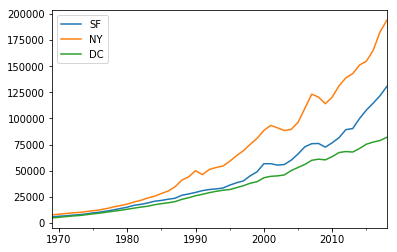

In [17]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()

In [18]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']

series id
SLOAS                         Student Loans Owned and Securitized, Outstanding
TOTALSL               Total Consumer Credit Owned and Securitized, Outstanding
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card Plans, All ...
MVLOAS                  Motor Vehicle Loans Owned and Securitized, Outstanding
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial Banks, 24 M...
REVOLSL              Total Revolving Credit Owned and Securitized, Outstanding
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card Plans, Acco...
TERMAFCNCNSA       New Car Average Finance Rate at Auto Finance Companies (...
Name: title, dtype: object

In [19]:
df = fred.search_by_release(151)
df['title'].head(10)

series id
AKPCPI                              Per Capita Personal Income in Alaska
ALPCPI                             Per Capita Personal Income in Alabama
ARPCPI                            Per Capita Personal Income in Arkansas
AZPCPI                             Per Capita Personal Income in Arizona
BEAFWPCPI          Per Capita Personal Income in the Far West BEA Region
BEAGLPCPI       Per Capita Personal Income in the Great Lakes BEA Region
BEAMEPCPI           Per Capita Personal Income in the Mideast BEA Region
BEANEPCPI       Per Capita Personal Income in the New England BEA Region
BEAPLPCPI            Per Capita Personal Income in the Plains BEA Region
BEARMPCPI    Per Capita Personal Income in the Rocky Mountain BEA Region
Name: title, dtype: object

In [20]:
state_df = df[~df['title'].str.startswith('Per Capita Personal Income in the')]

In [21]:
len(state_df)

50

In [22]:
state_df.id.str[:2]

series id
AKPCPI    AK
ALPCPI    AL
ARPCPI    AR
AZPCPI    AZ
CAPCPI    CA
COPCPI    CO
CTPCPI    CT
DEPCPI    DE
FLPCPI    FL
GAPCPI    GA
HIPCPI    HI
IAPCPI    IA
IDPCPI    ID
ILPCPI    IL
INPCPI    IN
KSPCPI    KS
KYPCPI    KY
LAPCPI    LA
MAPCPI    MA
MDPCPI    MD
MEPCPI    ME
MIPCPI    MI
MNPCPI    MN
MOPCPI    MO
MSPCPI    MS
MTPCPI    MT
NCPCPI    NC
NDPCPI    ND
NEPCPI    NE
NHPCPI    NH
NJPCPI    NJ
NMPCPI    NM
NVPCPI    NV
NYPCPI    NY
OHPCPI    OH
OKPCPI    OK
ORPCPI    OR
PAPCPI    PA
RIPCPI    RI
SCPCPI    SC
SDPCPI    SD
TNPCPI    TN
TXPCPI    TX
UTPCPI    UT
VAPCPI    VA
VTPCPI    VT
WAPCPI    WA
WIPCPI    WI
WVPCPI    WV
WYPCPI    WY
Name: id, dtype: object

In [23]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

In [24]:
income_by_state = pd.DataFrame(income_by_state)

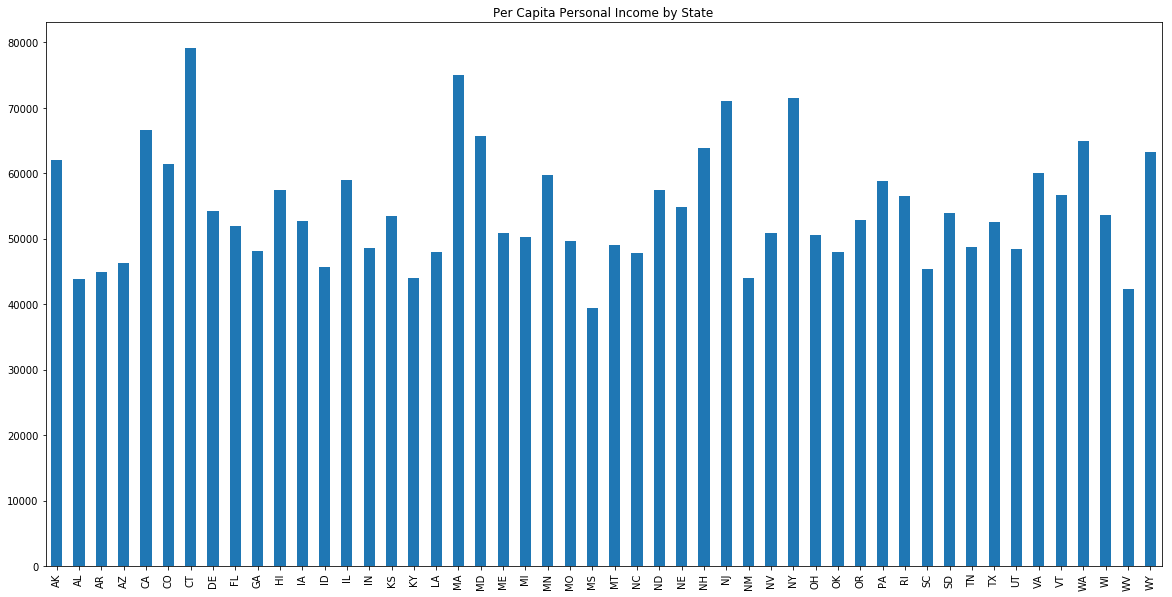

In [27]:
income_by_state.iloc[-1].plot(kind='bar', title = 'Per Capita Personal Income by State')

In [28]:
# GDP
gdp = fred.get_series('GDP')
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [29]:
# GDP REAL
gdp_real = fred.get_series('GDPC1')
gdp_real.tail()

2019-01-01    18927.281
2019-04-01    19021.860
2019-07-01    19121.112
2019-10-01    19221.970
2020-01-01    18987.877
dtype: float64

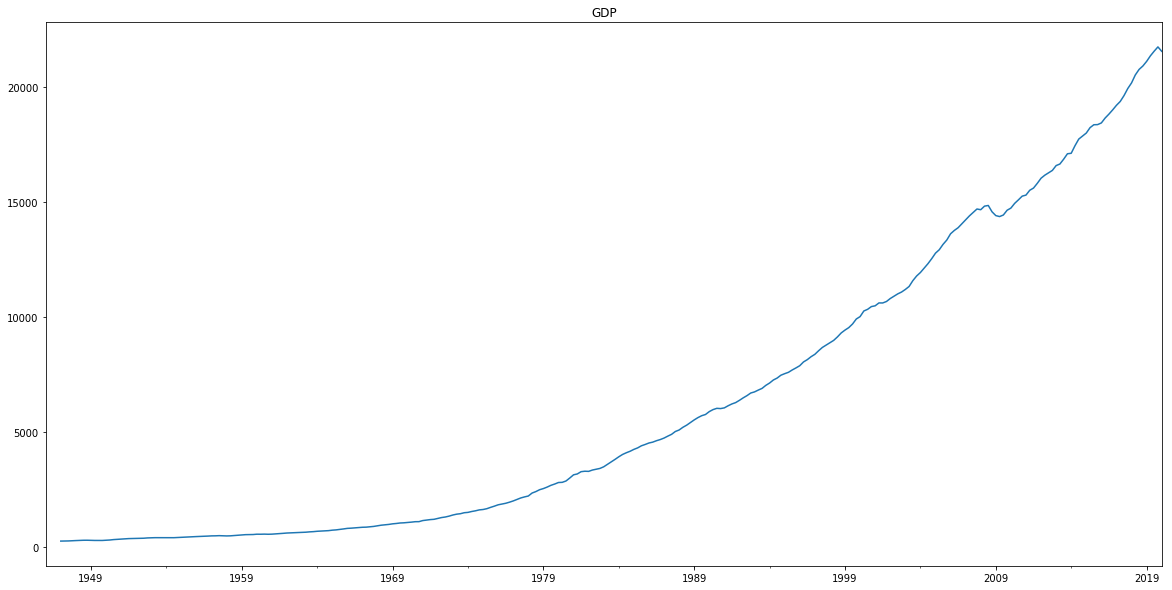

In [30]:
gdp.plot(title = "GDP")

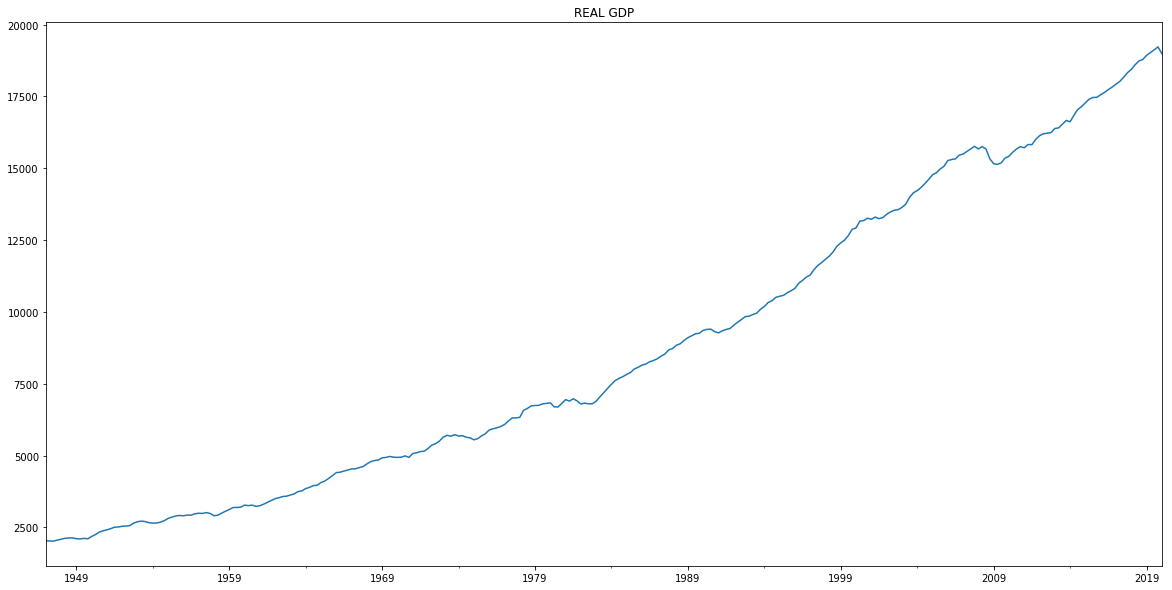

In [31]:
gdp_real.plot(title = "REAL GDP")

In [32]:
# REAL MEDIAN HOUSEHOLD INCOME
HouseHold_Income_Median = fred.get_series('MEHOINUSA672N')
HouseHold_Income_Median.tail()

2014-01-01    56969.0
2015-01-01    59901.0
2016-01-01    61779.0
2017-01-01    62626.0
2018-01-01    63179.0
dtype: float64

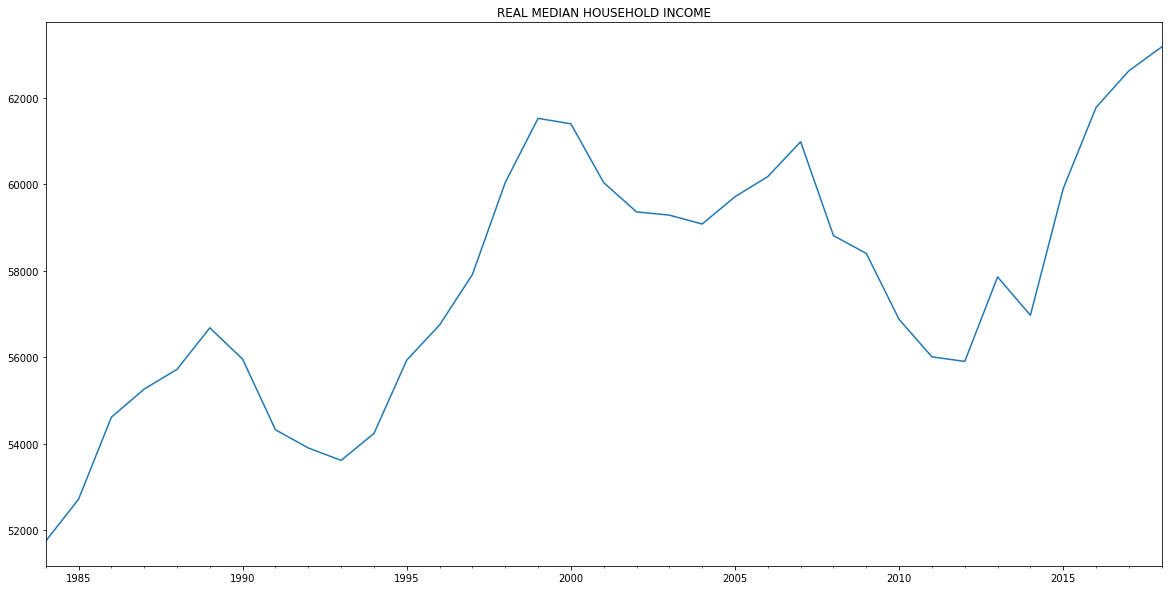

In [33]:
HouseHold_Income_Median.plot(title = "REAL MEDIAN HOUSEHOLD INCOME")

In [34]:
# Real gross domestic product per capita
gdp_real_percapita = fred.get_series('A939RX0Q048SBEA')
gdp_real_percapita.tail()

2019-01-01    57719.0
2019-04-01    57946.0
2019-07-01    58167.0
2019-10-01    58392.0
2020-01-01    57621.0
dtype: float64

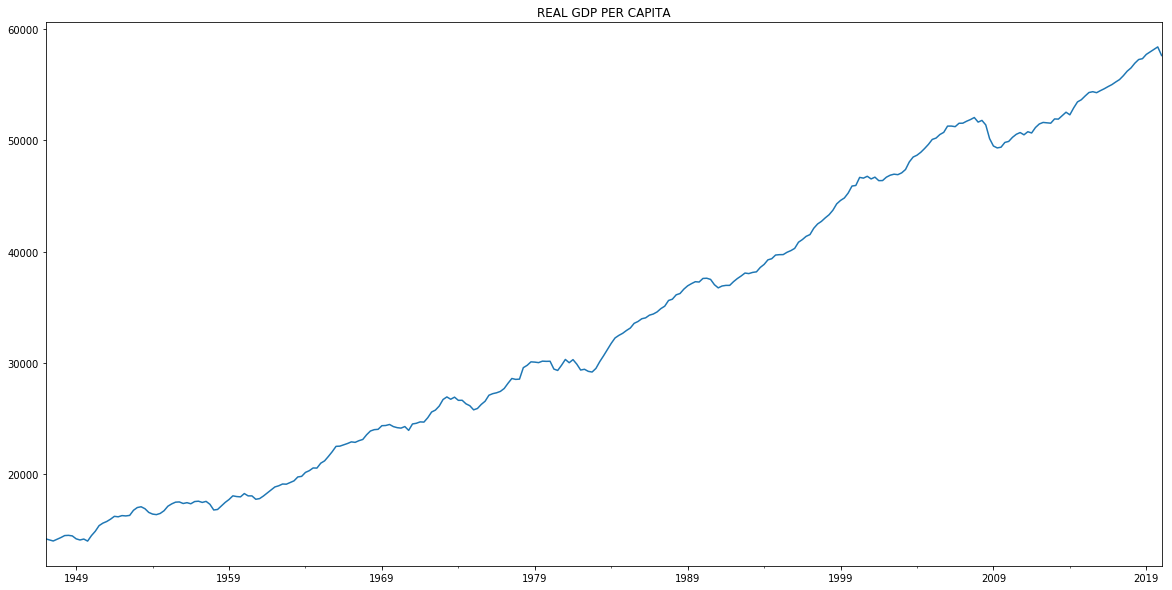

In [35]:
gdp_real_percapita.plot(title = "REAL GDP PER CAPITA")

In [36]:
# Real gross domestic product per capita
personal_saving_rate = fred.get_series('PSAVERT')
personal_saving_rate.tail()

2019-11-01     7.7
2019-12-01     7.5
2020-01-01     7.7
2020-02-01     8.0
2020-03-01    13.1
dtype: float64

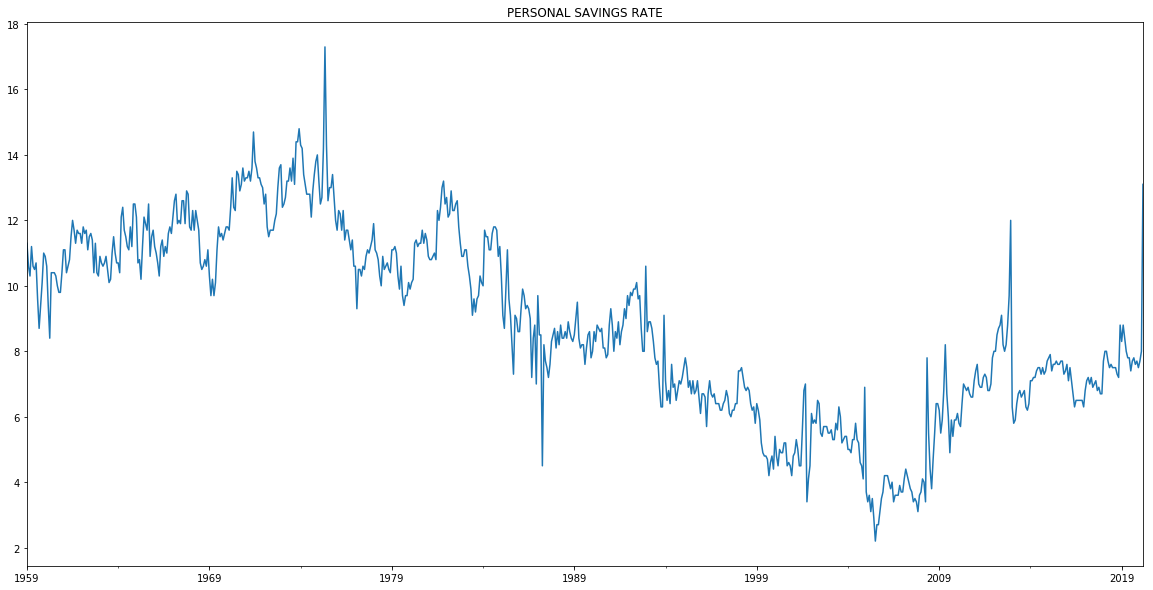

In [37]:
personal_saving_rate.plot(title = "PERSONAL SAVINGS RATE")

# Some Interactive Plots

In [38]:
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [39]:
# GDP 

gdp.hvplot(kind = "line", ylabel = "GDP")

:Curve   [index]   (0)

In [40]:
# Real GDP

gdp_real.hvplot(kind = "line", ylabel = "REAL GDP")

:Curve   [index]   (0)

In [41]:
# Real GDP PER CAPITA

gdp_real_percapita.hvplot(kind = "line", ylabel = "REAL GDP PER CAPITA")

:Curve   [index]   (0)

In [42]:
# Personal Savings Rate

personal_saving_rate.hvplot(kind = "line", ylabel = "PERSONAL SAVING RATE")

:Curve   [index]   (0)

In [43]:
# Search for available data in FRED

fred.search('savings').T

series id                                                                      PSAVERT  \
frequency                                                                      Monthly   
frequency_short                                                                      M   
id                                                                             PSAVERT   
last_updated                                                 2020-04-30 07:50:16-05:00   
notes                      BEA Account Code: A072RC Personal saving as a percentage...   
observation_end                                                    2020-03-01 00:00:00   
observation_start                                                  1959-01-01 00:00:00   
popularity                                                                          82   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                    Seasonally Adjusted Annual Rate   
seasonal_adjustment_short                                                         SAAR   
title                                                             Personal Saving Rate   
units                                                                          Percent   
units_short                                                                          %   

series id                                                                      SAVINGS  \
frequency                                                        Weekly, Ending Monday   
frequency_short                                                                      W   
id                                                                             SAVINGS   
last_updated                                                 2020-04-30 15:39:28-05:00   
notes                      The savings deposits component of M2 consists of passboo...   
observation_end                                                    2020-04-20 00:00:00   
observation_start                                                  1975-01-06 00:00:00   
popularity                                                                          63   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                                Seasonally Adjusted   
seasonal_adjustment_short                                                           SA   
title                            Total Savings Deposits at all Depository Institutions   
units                                                              Billions of Dollars   
units_short                                                                  Bil. of $   

series id                                                                       WSAVNS  \
frequency                                                        Weekly, Ending Monday   
frequency_short                                                                      W   
id                                                                              WSAVNS   
last_updated                                                 2020-04-30 15:39:50-05:00   
notes                      The savings deposits component of M2 consists of passboo...   
observation_end                                                    2020-04-20 00:00:00   
observation_start                                                  1975-01-06 00:00:00   
popularity                                                                          47   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short             

In [44]:
dir(fred)

['_Fred__do_series_search',
 '_Fred__fetch_data',
 '_Fred__get_search_results',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse',
 'api_key',
 'earliest_realtime_start',
 'get_series',
 'get_series_all_releases',
 'get_series_as_of_date',
 'get_series_first_release',
 'get_series_info',
 'get_series_latest_release',
 'get_series_vintage_dates',
 'latest_realtime_end',
 'max_results_per_request',
 'nan_char',
 'root_url',
 'search',
 'search_by_category',
 'search_by_release']

In [45]:
# Search for available data in FRED

fred.search('Financial Indicators').T

series id                                                                       STLFSI  \
frequency                                                        Weekly, Ending Friday   
frequency_short                                                                      W   
id                                                                              STLFSI   
last_updated                                                 2020-03-19 09:00:02-05:00   
notes                      The methodology for the St. Louis Fed's Financial Stress...   
observation_end                                                    2020-03-13 00:00:00   
observation_start                                                  1993-12-31 00:00:00   
popularity                                                                          77   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short                                                          NSA   
title                              St. Louis Fed Financial Stress Index (DISCONTINUED)   
units                                                                            Index   
units_short                                                                      Index   

series id                                                                         NFCI  \
frequency                                                        Weekly, Ending Friday   
frequency_short                                                                      W   
id                                                                                NFCI   
last_updated                                                 2020-04-29 07:36:02-05:00   
notes                      The Chicago Fed's National Financial Conditions Index (N...   
observation_end                                                    2020-04-24 00:00:00   
observation_start                                                  1971-01-08 00:00:00   
popularity                                                                          72   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short                                                          NSA   
title                                  Chicago Fed National Financial Conditions Index   
units                                                                            Index   
units_short                                                                      Index   

series id                                                                        KCFSI  \
frequency                                                                      Monthly   
frequency_short                                                                      M   
id                                                                               KCFSI   
last_updated                                                 2020-04-09 14:16:01-05:00   
notes                      To obtain further information please see: Financial Stre...   
observation_end                                                    2020-03-01 00:00:00   
observation_start                                                  1990-02-01 00:00:00   
popularity                                                                          57   
realtime_end                                                       2020-05-02 00:00:00   
realtime_start                                                     2020-05-02 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short             

In [46]:
# Unemployment

unemployment_rate = fred.get_series('UNRATE')
unemployment_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

In [47]:
# Unemployment Rate

unemployment_rate.hvplot(kind = "line", ylabel = "Unemployment Rate")

:Curve   [index]   (0)

In [48]:
# Consumer Price Index

consumer_price_index = fred.get_series('CPIAUCSL')
consumer_price_index.tail()

2019-11-01    257.824
2019-12-01    258.444
2020-01-01    258.820
2020-02-01    259.050
2020-03-01    257.953
dtype: float64

In [49]:
# Consumer Price Index

consumer_price_index.hvplot(kind = "line", ylabel = "Consumer Price Index")

:Curve   [index]   (0)

In [50]:
# US Debt

us_debt = fred.get_series('GFDEBTN')
us_debt.tail()

2018-10-01    21974096.0
2019-01-01    22027880.0
2019-04-01    22023283.0
2019-07-01    22719402.0
2019-10-01    23201380.0
dtype: float64

In [51]:
# US Debt

us_debt.hvplot(kind = "line", ylabel = "US Debt in Millions", yformatter = "%.0f")

:Curve   [index]   (0)

In [52]:
# Delinquency Rate

delinquency_rate = fred.get_series('DRSFRMACBS')
delinquency_rate.tail()

2018-10-01    2.83
2019-01-01    2.69
2019-04-01    2.59
2019-07-01    2.46
2019-10-01    2.35
dtype: float64

In [53]:
# Delinquency Rate

delinquency_rate.hvplot(kind = "line", ylabel = "Delinquency Rate")

:Curve   [index]   (0)

## Unemployment Rate Forecast (without any Stimulus)

In [54]:
# Unemployment Rate

NAME1 = unemployment_rate.hvplot(kind = "line", ylabel = "Unemployment Rate")
NAME1

:Curve   [index]   (0)

In [55]:
NAME2 = delinquency_rate.hvplot(kind = "line", ylabel = "Delinquency Rate", color = "black")
NAME2

:Curve   [index]   (0)

In [56]:
NAME1*NAME2

:Overlay
   .Curve.A_0.I  :Curve   [index]   (0)
   .Curve.A_0.II :Curve   [index]   (0)

In [57]:
# Calculate unemployment monthly change

unemployment_monthly_chg = unemployment_rate.pct_change()
unemployment_monthly_chg.head()

1948-01-01         NaN
1948-02-01    0.117647
1948-03-01    0.052632
1948-04-01   -0.025000
1948-05-01   -0.102564
dtype: float64

In [58]:
# Unemployment Rate change

unemployment_monthly_chg.hvplot(kind = "line", ylabel = "Unemployment monthly change")

:Curve   [index]   (0)

In [59]:
print(unemployment_monthly_chg.mean(), unemployment_monthly_chg.std())

0.001052154703227449 0.039315511568192726


In [60]:
# Average and Standard deviation for unemployment rate

unemployment_mean = unemployment_monthly_chg.mean()
unemployment_std = unemployment_monthly_chg.std()
print(unemployment_mean, unemployment_std)

0.001052154703227449 0.039315511568192726


In [61]:
# Unemployment Rate forecast prior to COVID-19 impact
# Unemployment Rates are monthly aggregates and published monthly

num_simulations = 100
num_months = 60

In [62]:
# Set last unemployment rate
unemployment_last = unemployment_rate[-1]
unemployment_last

4.4

In [63]:
# Initialize empty dataframe
simulated_unemployment = pd.DataFrame()

In [64]:
# Run the simulation for the next "60" months, "100" times

for n in range(num_simulations):
    
    # Initialize simulated unemployment with the last unemployment
    simulated_unemployment_values = [unemployment_last]
    
simulated_unemployment_values    

[4.4]

In [65]:
simulated_unemployment

Empty DataFrame
Columns: []
Index: []

In [67]:
# Run the simulation for the next "60" months, "100" times

for n in range(num_simulations):
    
    # Initialize simulated unemployment with the last unemployment
    simulated_unemployment_values = [unemployment_last]
    
    # Simulate unemployment for 60 months
    for i in range(num_months):
        
        # Calculate simulated unemployment using the last unemployment value within the list
        simulated_unemployment_monthly = simulated_unemployment_values[-1] + np.random.normal(unemployment_mean, unemployment_std)
        
        # Append to the list
        simulated_unemployment_values.append(simulated_unemployment_monthly)
        
    # Append from each simulation run to the dataframe
    
    simulated_unemployment[f'sim_{n}'] = pd.Series(simulated_unemployment_values)
    
# Print some records from the dataframe
simulated_unemployment   

sim_ 0    sim_ 1    sim_ 2    sim_ 3    sim_ 4    sim_ 5    sim_ 6  \
0   4.400000  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000   
1   4.464140  4.418725  4.435433  4.366464  4.344421  4.426011  4.452833   
2   4.491495  4.387345  4.397610  4.344607  4.314100  4.432922  4.412077   
3   4.543223  4.389073  4.357858  4.378106  4.284918  4.452165  4.398336   
4   4.617778  4.394404  4.369128  4.395738  4.331267  4.488934  4.392895   
5   4.644071  4.390105  4.396108  4.456237  4.230458  4.466916  4.404214   
6   4.646663  4.389435  4.419893  4.512246  4.163957  4.360771  4.443037   
7   4.705498  4.387558  4.378917  4.480411  4.145899  4.388126  4.482045   
8   4.676679  4.373197  4.415934  4.548568  4.192209  4.406376  4.454640   
9   4.677454  4.377621  4.419030  4.507560  4.146162  4.429198  4.460363   
10  4.686657  4.405087  4.373256  4.460567  4.143869  4.472431  4.487534   
11  4.674764  4.382590  4.362166  4.450943  4.148455  4.480119  4.480748   
12  4.640129  4.386339  4.352733  4.392599  4.239434  4.494146  4.509801   
13  4.636036  4.401448  4.321938  4.423305  4.333011  4.528065  4.498668   
14  4.655610  4.381710  4.281382  4.369310  4.349972  4.548288  4.520004   
15  4.722022  4.386922  4.297499  4.247869  4.392455  4.549625  4.532090   
16  4.724768  4.430532  4.284931  4.279151  4.407078  4.541627  4.544770   
17  4.745530  4.402743  4.280419  4.201120  4.426236  4.542895  4.515268   
18  4.692702  4.383106  4.227497  4.208917  4.405058  4.557969  4.506390   
19  4.752408  4.366033  4.254608  4.213281  4.390058  4.548827  4.459537   
20  4.736588  4.368403  4.255615  4.192731  4.393263  4.536306  4.394324   
21  4.792766  4.371427  4.256043  4.190148  4.445684  4.539540  4.415918   
22  4.797547  4.362151  4.230327  4.112203  4.460225  4.549714  4.396185   
23  4.774047  4.310577  4.232948  4.081451  4.390041  4.542761  4.400970   
24  4.832045  4.351361  4.201358  4.059819  4.378975  4.575874  4.460655   
25  4.869598  4.320416  4.255543  4.079064  4.415636  4.596554  4.464970   
26  4.791728  4.342121  4.210870  4.080930  4.375343  4.639355  4.515552   
27  4.778957  4.366611  4.157751  4.049077  4.393833  4.651354  4.579233   
28  4.790875  4.335740  4.138087  3.989234  4.376140  4.646174  4.531561   
29  4.812471  4.384175  4.079930  4.002933  4.399645  4.648102  4.599671   
..       ...       ...       ...       ...       ...       ...       ...   
31  4.743436  4.328455  4.071256  4.000404  4.435123  4.689777  4.615555   
32  4.697294  4.319032  4.136138  3.977469  4.406716  4.720177  4.621218   
33  4.661502  4.339608  4.124353  3.920069  4.442581  4.732800  4.593427   
34  4.701225  4.344668  4.169087  3.965947  4.409942  4.753602  4.598344   
35  4.782826  4.292514  4.129145  3.938517  4.408585  4.801790  4.643948   
36  4.768971  4.337833  4.137527  3.934088  4.439881  4.755307  4.621786   
37  4.731956  4.287382  4.158995  3.989363  4.348408  4.843563  4.555915   
38  4.761217  4.253636  4.120685  3.946449  4.334430  4.836143  4.491719   
39  4.810609  4.235573  4.078743  3.957991  4.327686  4.845858  4.407968   
40  4.819397  4.170275  4.060160  3.985817  4.248641  4.855578  4.491625   
41  4.781848  4.155830  4.012706  3.949388  4.250432  4.758816  4.417797   
42  4.788114  4.122069  3.965235  3.945259  4.229831  4.744446  4.455888   
43  4.853628  4.042194  3.977257  3.915579  4.237469  4.709230  4.467132   
44  4.869393  4.039693  3.959593  3.864900  4.305634  4.644555  4.396505   
45  4.850073  4.030894  3.960485  3.859769  4.283450  4.612363  4.456924   
46  4.822017  4.071307  3.948023  3.842060  4.267059  4.693103  4.454198   
47  4.859534  4.086544  3.979194  3.761137  4.243427  4.767150  4.448165   
48  4.871025  4.036990  4.003849  3.791348  4.176004  4.750203  4.450684   
49  4.892414  3.996581  3.961344  3.799959  4.222787  4.709198  4.509652   
50  4.868884  4.032656  3.934069  3.781619  4.184872  4.652819  4.545620   
51  4.922130  4.052156  3.907768  3.767313  4.170763  

## Plot simulated Unemployment distributions

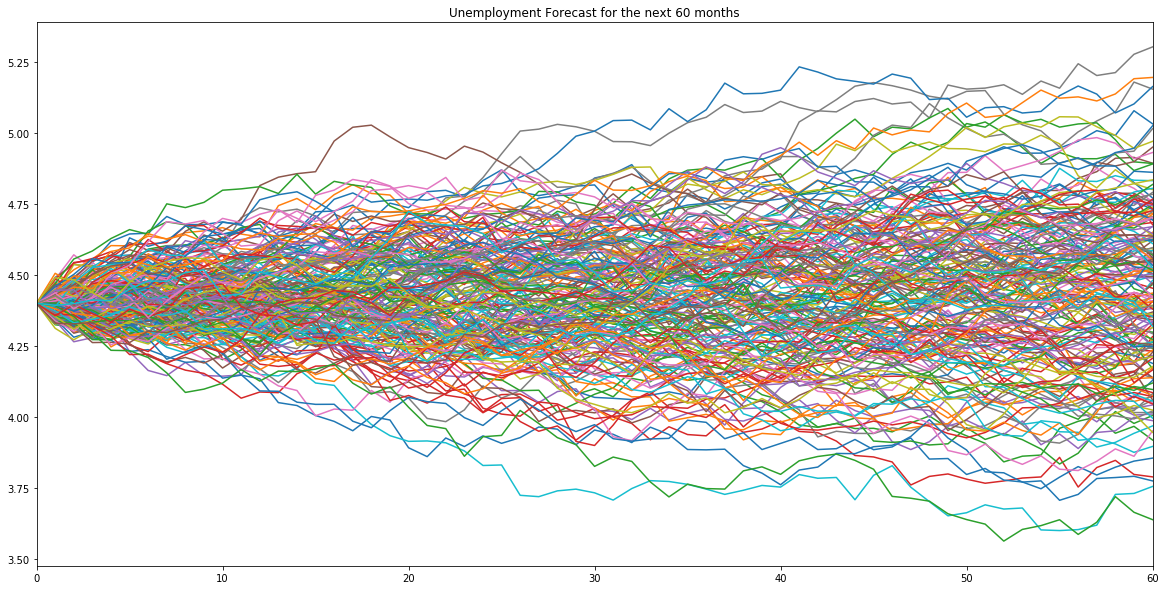

In [68]:
# Unemployment forecast

plot_title = f"Unemployment Forecast for the next {num_months} months"
simulated_unemployment.plot(legend=None, title=plot_title)